# **Rerieve Lyrics**

In [6]:
import lyricsgenius
genius_client_id = "wZZ2RWc5mqp-5Pbz2W1rQJWE8LQ3pFBrb1Hw5_AOqgybq28mt7kjdjcG4zktCNbO"
genius_client_secret = "PefqBJHor_muDgTutGlaXXaxmzsI7TQCps9FQ3FwkUTT0WJIT3s0A5YA9mnFbfp_-CBhQF7b0omgE8kaM3dJ3w"
genius_access_token = "NUHHVpwnmbDYUYw8Padu0gQeHvYN4OsKYtE2MKNUpBUI6yR-xZXKY6S5NvCnFbiP"


genius = lyricsgenius.Genius("genius_access_token")

def get_lyrics(song_title, artist_name):
    song = genius.search_song(song_title, artist_name)
    if song:
        return song.lyrics
    return None

# Example usage
lyrics = get_lyrics("Shape of You", "Ed Sheeran")
print(lyrics)

Searching for "Shape of You" by Ed Sheeran...
Done.
350 ContributorsTranslationsTürkçeEspañolPortuguêsΕλληνικάDeutschFrançaisItalianoالعربيةShape of You Lyrics[Verse 1]
A club isn't the best place to find a lover
So the bar is where I go (Mm)
Me and my friends at the table doin' shots
Drinkin' fast and then we talk slow (Mm)
And you come over and start up a conversation with just me
And trust me, I'll give it a chance now (Mm)
Take my hand, stop, put Van the Man on the jukebox
And then we start to dance and now I'm singin' like

[Pre-Chorus]
Girl, you know I want your love
Your love was handmade for somebody like me
Well, come on now, follow my lead
I may be crazy, don't mind me
Say, "Boy, let's not talk too much"
Grab on my waist and put that body on me
Well, come on now, follow my lead
Come, come on now, follow my lead, mm

[Chorus]
I'm in love with the shape of you
We push and pull like a magnet do
Although my heart is fallin' too
I'm in love with your body
And last night, you were 

In [7]:
import re

def preprocess_lyrics(lyrics):
    # Remove identifiers like chorus, verse, etc
    lyrics = re.sub(r'\[(.*?)\]', ' ', lyrics)
    # Remove any non-alphabetic characters and convert to lowercase
    lyrics = re.sub(r'[^a-zA-Z\s]', '', lyrics).lower()
    return lyrics

# Preprocess example lyrics
preprocessed_lyrics = preprocess_lyrics(lyrics)
#print(preprocessed_lyrics)

# **Get Emotions of Lyrics**

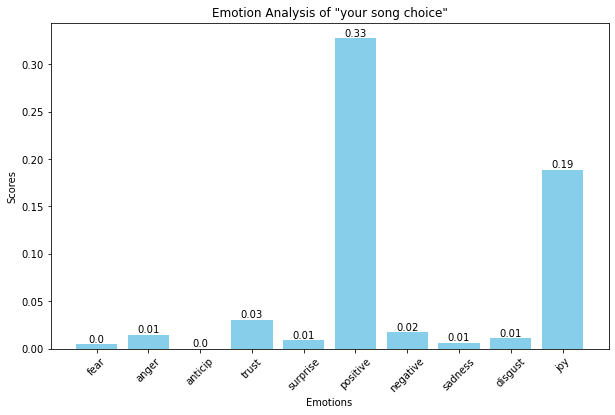

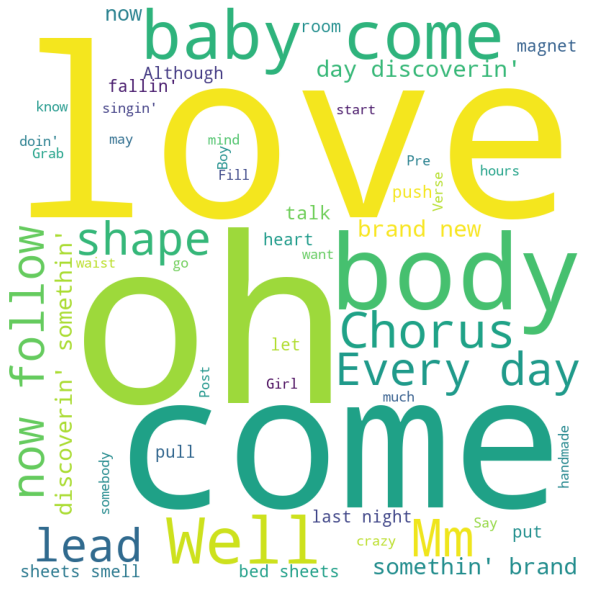

In [8]:
# Import required libraries
import matplotlib.pyplot as plt
from nrclex import NRCLex
from wordcloud import WordCloud, STOPWORDS


# Splitting the lyrics into lines for emotion analysis
lines = lyrics.split('\n')

# Emotion Analysis using NRCLex
emotion_scores = { 'fear': 0, 'anger': 0, 'anticip': 0, 'trust': 0, 'surprise': 0, 'positive': 0, 'negative': 0, 'sadness': 0, 'disgust': 0, 'joy': 0 }

for line in lines:
    if line.strip():  # Check if the line is not empty
        text_object = NRCLex(line)
        for emotion in emotion_scores.keys():
            emotion_scores[emotion] += text_object.affect_frequencies.get(emotion, 0)

# Normalizing the scores
total_lines = len([line for line in lines if line.strip()])
for emotion in emotion_scores:
    emotion_scores[emotion] /= total_lines

# Visualization - Bar Chart
emotions = list(emotion_scores.keys())
scores = list(emotion_scores.values())

plt.figure(figsize=(10, 6))
bars = plt.bar(emotions, scores, color='skyblue')

# Adding value labels on each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.xlabel('Emotions')
plt.ylabel('Scores')
plt.title('Emotion Analysis of "your song choice"')
plt.xticks(rotation=45)
plt.show()

# Word Cloud Generation
# Define a set of words to exclude (common and explicit words)
explicit_stopwords = {'explicit1', 'explicit2', 'explicit3'}  # Replace with actual explicit words
stopwords = set(STOPWORDS).union(explicit_stopwords)

wordcloud = WordCloud(width=800, height=800, 
                      background_color='white', 
                      stopwords=stopwords, 
                      min_font_size=10).generate(lyrics)

# Displaying the Word Cloud
plt.figure(figsize=(8, 8), facecolor=None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad=0)
plt.show()

In [9]:
from textblob import TextBlob

def analyze_sentiment(lyrics):
    blob = TextBlob(lyrics)
    return blob.sentiment

# Analyze sentiment of preprocessed lyrics
sentiment = analyze_sentiment(lyrics)
print(f"Sentiment polarity: {sentiment.polarity}, Sentiment subjectivity: {sentiment.subjectivity}")

# Polarity is a float within the range [-1.0, 1.0] where 1 means positive statement and -1 means a negative statement.
#Subjectivity quantifies the amount of personal opinion and factual information contained in the text. The higher subjectivity means that the text contains personal opinion rather than factual information.

Sentiment polarity: 0.31235177865612657, Sentiment subjectivity: 0.5002305665349145


# **Count Frequency of Words**

In [10]:
from collections import Counter

def word_frequency(lyrics):
    words = lyrics.split()
    return Counter(words)

# Get word frequencies for preprocessed lyrics
word_freq = word_frequency(lyrics)
print(word_freq.most_common(10))

[('my', 33), ('on', 26), ('in', 26), ('love', 25), ("I'm", 23), ('with', 22), ('come', 21), ('your', 19), ('I,', 18), ('oh,', 18)]


# **Profanity Content**

In [11]:
lyrics = get_lyrics("Kim", "Eminem")

Searching for "Kim" by Eminem...
Done.


In [12]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('profanity_en.csv')

# Display the first few rows to understand its structure
df.head()


,text,canonical_form_1,canonical_form_2,canonical_form_3,category_1,category_2,category_3,severity_rating,severity_description
0,69,69,NaN,NaN,sexual anatomy / sexual acts,NaN,NaN,1.0,Mild
1,@55,ass,NaN,NaN,sexual anatomy / sexual acts,NaN,NaN,1.0,Mild
2,@ssfcker,fuck,ass,NaN,sexual anatomy / sexual acts,sexual orientation / gender,NaN,2.8,Severe
3,@ssfucker,fuck,ass,NaN,sexual anatomy / sexual acts,sexual orientation / gender,NaN,2.8,Severe
4,@ssfvcker,fuck,ass,NaN,sexual anatomy / sexual acts,sexual orientation / gender,NaN,2.4,Strong


In [13]:
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer

# Prepare a set of profanity words for faster lookup
profanity_set = set(df['text'].str.lower())


# Function to check for profanity and calculate frequency and density
def analyze_lyrics_for_profanity(lyrics):
    # Normalize the lyrics for comparison
    words = lyrics.lower().split()
    total_words = len(words)
    
    # Find profanity words in the lyrics
    profanity_found = [word for word in words if word in profanity_set]
    
    # Calculate frequency of each profanity word
    profanity_freq = Counter(profanity_found)
    
    # Map profanity words to their categories
    profanity_categories = [df[df['text'].str.lower() == word]['category_1'].iloc[0] for word in profanity_found]
    
    # Calculate frequency of each category
    category_freq = Counter(profanity_categories)
    
    # Calculate density of profanity words in the lyrics
    profanity_density = len(profanity_found) / total_words if total_words else 0
    
    # Return the top 3 categories
    top_3_categories = category_freq.most_common(3)
    
    return {
        'total_words': total_words,
        'profanity_count': len(profanity_found),
        'profanity_density': profanity_density,
        'top_3_categories': top_3_categories
    }

# Example lyrics to test the function
#test_lyrics = "Your lyrics here. Replace this with the actual lyrics you want to analyze."

# Analyze the example lyrics
analyze_lyrics_for_profanity(lyrics)


{'total_words': 853,
 'profanity_count': 12,
 'profanity_density': 0.01406799531066823,
 'top_3_categories': [('sexual anatomy / sexual acts', 10),
  ('bodily fluids / excrement', 1),
  ('sexual orientation / gender', 1)]}

# **NER**

In [14]:
import spacy
# **NER**
nlp = spacy.load("en_core_web_sm")

def extract_entities(lyrics):
    doc = nlp(lyrics)
    return [(ent.text, ent.label_) for ent in doc.ents]

# Extract named entities from preprocessed lyrics
entities = extract_entities(lyrics)
for entity in entities:
    print(entity)


('298', 'CARDINAL')
('Eminem & Kim', 'ORG')
('Yesterday', 'DATE')
('Wiped', 'PERSON')
('two', 'CARDINAL')
('1', 'CARDINAL')
('Eminem & Kim', 'ORG')
('Kim', 'PERSON')
('Kim', 'PERSON')
('Hailie', 'ORG')
('2', 'CARDINAL')
('Eminem & Kim', 'ORG')
('Kim', 'PERSON')
('Kim', 'PERSON')
('years ago', 'DATE')
('Bullshit', 'PERSON')
('Kim', 'PERSON')
('Kim', 'PERSON')
('3', 'CARDINAL')
('Eminem & Kim', 'ORG')
('Hailie', 'EVENT')
('Marshall', 'PERSON')
('Brian', 'PERSON')
('Archie', 'GPE')
('one', 'CARDINAL')
('Adam', 'PERSON')
('Kim', 'PERSON')


# **Topic Modlling**

In [15]:
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('# **Topic Modlling**punkt')

# Assuming preprocessed_lyrics is a list of documents (lyrics)
documents = [word_tokenize(doc) for doc in preprocessed_lyrics]

# Remove stop words
stop_words = set(stopwords.words('english'))
texts = [[word for word in document if word not in stop_words] for document in documents]

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(texts)

# Convert dictionary to a bag of words corpus for reference
corpus = [dictionary.doc2bow(text) for text in texts]

# Using the LDA model
lda = LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15)

# Print the topics
topics = lda.print_topics(num_words=4)
for topic in topics:
    print(topic)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JUJU\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Error loading # **Topic Modlling**punkt: Package '#
[nltk_data]     **Topic Modlling**punkt' not found in index


(0, '0.989*"e" + 0.006*"x" + 0.000*"f" + 0.000*"l"')
(1, '0.984*"n" + 0.008*"z" + 0.001*"g" + 0.001*"h"')
(2, '0.755*"c" + 0.228*"k" + 0.001*"e" + 0.001*"r"')
(3, '0.780*"r" + 0.206*"p" + 0.001*"w" + 0.001*"g"')
(4, '0.934*"f" + 0.004*"l" + 0.004*"v" + 0.004*"e"')
(5, '0.476*"j" + 0.033*"n" + 0.033*"w" + 0.033*"v"')
(6, '0.607*"l" + 0.385*"w" + 0.000*"h" + 0.000*"n"')
(7, '0.967*"v" + 0.002*"c" + 0.002*"e" + 0.002*"f"')
(8, '0.752*"u" + 0.230*"g" + 0.001*"r" + 0.001*"p"')
(9, '0.503*"h" + 0.490*"b" + 0.000*"e" + 0.000*"c"')


In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Assuming lyrics_data is your list containing the single string of lyrics
lyrics_data = [lyrics]  # This should be your actual lyrics string

# Initialize the CountVectorizer
tf_vectorizer = CountVectorizer(stop_words='english')

# This should not produce an error given lyrics_data is formatted correctly
tf = tf_vectorizer.fit_transform(lyrics_data)

# Fit the LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=0)
lda.fit(tf)

# Function to display topics
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

# Display the top words in the topics
no_top_words = 10
tf_feature_names = tf_vectorizer.get_feature_names()
display_topics(lda, tf_feature_names, no_top_words)


Topic 0:
yesterday fine hair guy grip grab gotcha girl fucking finally
Topic 1:
yesterday fine hair guy grip grab gotcha girl fucking finally
Topic 2:
yesterday fine hair guy grip grab gotcha girl fucking finally
Topic 3:
bitch don kim did fuck eminem wanna living world wrong
Topic 4:
yesterday fine hair guy grip grab gotcha girl fucking finally


# https://www.kaggle.com/code/samuelcortinhas/nlp6-topic-modelling-with-lda

In [17]:
import numpy as np
import pandas as pd
pd.set_option('max_colwidth', 600)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.6)
import spacy
import random
from gensim import models, corpora, similarities
from wordcloud import WordCloud

In [18]:
# Load data into list D:\2324Sem2\BT4222\Project\Potential Dataset\spotify_millsongdata.csv
file_path = r'D:/2324Sem2/BT4222/Project/Potential Dataset/spotify_millsongdata.csv'

# Use pandas to read the CSV file
#df = pd.read_csv(file_path)

songs_df = pd.read_csv('spotify_millsongdata.csv')
data = list(songs_df["text"])

# Print length and example
print("Number of songs:", len(data))
print("\nFirst song:", data[0])

Number of songs: 57650

First song: Look at her face, it's a wonderful face  
And it means something special to me  
Look at the way that she smiles when she sees me  
How lucky can one fellow be?  
  
She's just my kind of girl, she makes me feel fine  
Who could ever believe that she could be mine?  
She's just my kind of girl, without her I'm blue  
And if she ever leaves me what could I do, what could I do?  
  
And when we go for a walk in the park  
And she holds me and squeezes my hand  
We'll go on walking for hours and talking  
About all the things that we plan  
  
She's just my kind of girl, she makes me feel fine  
Who could ever believe that she could be mine?  
She's just my kind of girl, without her I'm blue  
And if she ever leaves me what could I do, what could I do?




In [20]:
# Clean text
clean_data = [i.replace('\n','').replace('\r','') for i in data]

In [21]:
#Load English language model
nlp = spacy.load("en_core_web_sm")

# Disable named-entity recognition and parsing to save time
unwanted_pipes = ["ner", "parser"]

# Custom tokenizer using spacy
def custom_tokenizer(doc):
    with nlp.disable_pipes(*unwanted_pipes):
        return [t.lemma_ for t in nlp(doc) if t.is_alpha and not t.is_space and not t.is_punct and not t.is_stop and t.pos_ in ["ADJ","NOUN","VERB"]]

In [8]:
%%time

# Tokenize data
tokenized_data = list(map(custom_tokenizer, nlp.pipe(clean_data, n_process=4)))

# Print example
print(tokenized_data[0])

['look', 'face', 'wonderful', 'face', 'mean', 'special', 'look', 'way', 'smile', 'see', 'lucky', 'fellow', 'kind', 'girl', 'make', 'feel', 'fine', 'believe', 'kind', 'girl', 'blue', 'leave', 'walk', 'park', 'hold', 'squeeze', 'hand', 'walk', 'hour', 'talk', 'thing', 'plan', 'kind', 'girl', 'make', 'feel', 'fine', 'believe', 'kind', 'girl', 'blue', 'leave']
Wall time: 26min 40s


In [23]:
# Save Tokenized data
import pickle

# Assuming `tokenized_data` is your list of tokenized documents
with open('tokenized_data.pkl', 'wb') as file:
    pickle.dump(tokenized_data, file)

print("Tokenized data has been saved locally.")

Tokenized data has been saved locally.


In [30]:
import pickle
with open('tokenized_data.pkl', 'rb') as file:
    tokenized_data = pickle.load(file)

print("Tokenized data has been loaded.")
print(tokenized_data[0])  # Example to print first document's tokens

Tokenized data has been loaded.
['look', 'face', 'wonderful', 'face', 'mean', 'special', 'look', 'way', 'smile', 'see', 'lucky', 'fellow', 'kind', 'girl', 'make', 'feel', 'fine', 'believe', 'kind', 'girl', 'blue', 'leave', 'walk', 'park', 'hold', 'squeeze', 'hand', 'walk', 'hour', 'talk', 'thing', 'plan', 'kind', 'girl', 'make', 'feel', 'fine', 'believe', 'kind', 'girl', 'blue', 'leave']


In [32]:
# Build dictionary of (token, ID) mappings
dct = corpora.Dictionary(tokenized_data)

# Print vocab size
print('Size of vocabulary before filtering:', len(dct))

# Filter overly low and high frequency tokens
dct.filter_extremes(no_below=5, no_above=0.5)

# Print vocab size
print('\nSize of vocabulary after filtering:', len(dct))

# Example mappings
print("\nExample mappings:", [(i,dct.token2id[i]) for i in tokenized_data[0][:10]])

Size of vocabulary before filtering: 48255

Size of vocabulary after filtering: 13085

Example mappings: [('look', 12), ('face', 2), ('wonderful', 26), ('face', 2), ('mean', 15), ('special', 20), ('look', 12), ('way', 25), ('smile', 19), ('see', 18)]


In [33]:
# Bag-of-Words sparse matrix
bow = [dct.doc2bow(i) for i in tokenized_data]

In [34]:
%%time

# Train LDA model
lda_model = models.LdaModel(corpus=bow, num_topics=10, passes=10, alpha='auto', eta='auto', id2word=dct, random_state=0)

Wall time: 5min 12s


In [35]:
# Print generated topics
lda_model.print_topics()

[(0,
  '0.055*"want" + 0.044*"feel" + 0.044*"let" + 0.035*"life" + 0.032*"need" + 0.023*"live" + 0.020*"hold" + 0.018*"heart" + 0.017*"believe" + 0.017*"lose"'),
 (1,
  '0.079*"go" + 0.061*"time" + 0.039*"way" + 0.039*"get" + 0.036*"think" + 0.027*"tell" + 0.026*"thing" + 0.025*"say" + 0.022*"leave" + 0.018*"mind"'),
 (2,
  '0.086*"day" + 0.038*"world" + 0.037*"cry" + 0.032*"dream" + 0.024*"blue" + 0.022*"tear" + 0.021*"remember" + 0.020*"rain" + 0.019*"new" + 0.018*"eye"'),
 (3,
  '0.126*"come" + 0.087*"girl" + 0.077*"little" + 0.076*"good" + 0.043*"tonight" + 0.040*"like" + 0.038*"night" + 0.034*"boy" + 0.032*"bad" + 0.021*"crazy"'),
 (4,
  '0.024*"light" + 0.017*"come" + 0.014*"burn" + 0.013*"fly" + 0.013*"night" + 0.013*"sing" + 0.013*"high" + 0.012*"fire" + 0.011*"hear" + 0.011*"sky"'),
 (5,
  '0.083*"get" + 0.025*"be" + 0.023*"money" + 0.021*"fuck" + 0.020*"shit" + 0.019*"nigga" + 0.017*"bitch" + 0.013*"hit" + 0.011*"ride" + 0.008*"big"'),
 (6,
  '0.015*"head" + 0.012*"kill" + 0.

In [36]:
print(lda_model.alpha) # Document-topic prior
print(lda_model.eta) # Topic-word prior (beta)

[1.3915763  1.4233966  0.7558739  0.47923684 0.98893076 0.2656358
 0.7040797  0.6292617  0.39174557 0.25851533]
[0.0720741  0.09372056 0.22639221 ... 0.06339499 0.06338126 0.06354523]


In [37]:
# Get topics
topics = list(lda_model.get_document_topics(bow, minimum_probability=0))

# Print topic proportion in corpus
for i in range(10):
    print(f"Topic {i} proportion: {100*sum([pair[i][1] for pair in topics])/len(topics):.1f}%")

Topic 0 proportion: 19.1%
Topic 1 proportion: 19.4%
Topic 2 proportion: 9.9%
Topic 3 proportion: 6.0%
Topic 4 proportion: 14.7%
Topic 5 proportion: 4.4%
Topic 6 proportion: 9.3%
Topic 7 proportion: 8.5%
Topic 8 proportion: 5.7%
Topic 9 proportion: 3.2%


In [38]:
# Return top topics in a song
def get_top_topics(song_idx, min_prob):

    # Sort topics from highest to lowest frequency
    topics = sorted(lda_model.get_document_topics(bow[song_idx], minimum_probability=min_prob), key=lambda tup: tup[1])[::-1]

    # Get word distribution for each topic
    pairs = [lda_model.show_topic(pair[0]) for pair in topics]
    topic_words = [[pair[0] for pair in topic] for topic in pairs]

    return pd.DataFrame({'Major Topics': topics,'Topic Words': topic_words})

In [39]:
# Example
display(get_top_topics(100, 0.25))
print(data[100][:300])

,Major Topics,Topic Words
0,"(4, 0.41720018)","[light, come, burn, fly, night, sing, high, fire, hear, sky]"


The city is a jungle, you better take care  
Never walk alone after midnight  
If you don't believe it you better beware  
Of me  
  
I am behind you, I'll always find you, I am the tiger  
People who fear me never go near me, I am the tiger  
  
The city is a nightmare, a horrible dream  



In [40]:
# Coherence score (closer to 0 the better)
coherence_model = models.coherencemodel.CoherenceModel(model=lda_model, texts=tokenized_data, dictionary=dct, coherence='u_mass')
coherence_score = coherence_model.get_coherence()
print(f'Coherence Score: {coherence_score:.4f}')

Coherence Score: -2.3014


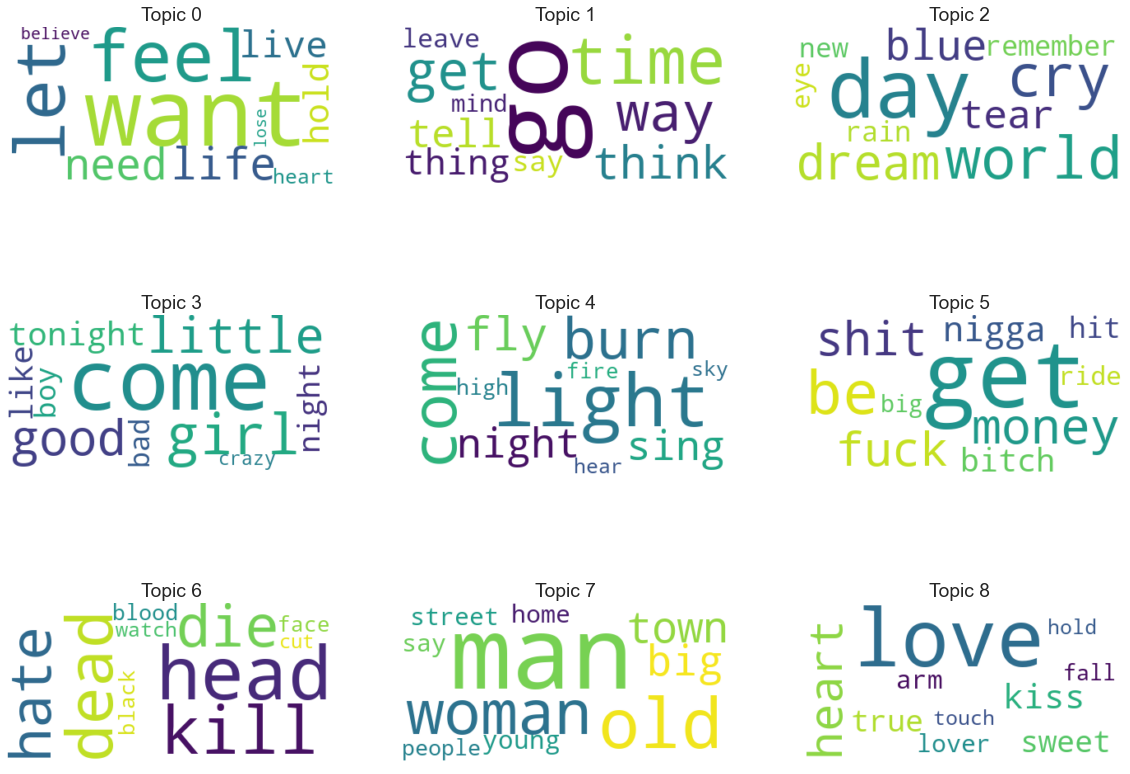

In [41]:
# Plot word clouds for each topic
word_cloud = WordCloud(background_color='white', max_words=10)
fig, axes = plt.subplots(3, 3, figsize=(20,15))

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(lda_model.show_topic(i))
    word_cloud.generate_from_frequencies(topic_words)
    plt.gca().imshow(word_cloud, interpolation='bilinear')
    plt.gca().set_title(f'Topic {i}')
    plt.gca().axis('off')
plt.show()

In [42]:
# Compute and rank consine similarities
lda_index = similarities.MatrixSimilarity(lda_model[bow], num_features=len(dct))

In [43]:
# Returns most similar songs to a given song
def get_similar_songs(song_bow, top_n=5, first_m_words=300):
    similar_songs = lda_index[lda_model[song_bow]]
    top_n_docs = sorted(enumerate(similar_songs), key=lambda item: -item[1])[1:top_n+1]
  
    # Returns (song id, similarity score, first_m_words of song)
    return list(map(lambda entry: (entry[0], entry[1], clean_data[entry[0]][:first_m_words]), top_n_docs))

In [44]:
# Example
print(data[6864][:300],'\n')
get_similar_songs(bow[6864])

[Verse:]  
She's just a girl and she's on fire  
Hotter than a fantasy, lonely like a highway  
She's living in a world and it's on fire  
Filled with catastrophe, but she knows she can fly away  
  
Ohhhh oh oh oh oh  
She got both feet on the ground  
And she's burning it down  
Ohhhh oh  



[(32754,
  0.9933786,
  "It's night, again  Time for my mind to go wandering  Off on a journey, through space and time  In search of a face I can never find  So I close my eyes and look inside    I can't forget  The night that I saw her we never met  She felt so close to me as I reached for her hand  She drifted away like t"),
 (3521,
  0.9896216,
  "I see a bad moon rising.  I see trouble on the way.  I see earthquakes and lightnin'.  I see bad times today.    Don't go around tonight,  Well it's bound to take your life,  There's a bad moon on the rise.    I hear hurricanes a blowing.  I know the end is coming soon.  I fear rivers over flowing. "),
 (652,
  0.98928314,
  "The waves come in  Crash on the shoreline  Salty water, don't you know  It's yours, yours and mine  So grab your girl  And don't go wastin' time  And let's go down to the water tonight    White capped clouds  Dance in the sunlight  Purple fishes watch  And show you some of their delight  The weather"),
 (39328,
  0.98

In [45]:
# Pass new song through pipeline
new_song = "Demons on my shoulder Monsters in my head Shadow in the water Will you be my friend The world revolves around me As I lay in my bed Dreaming of more, more"
new_tokens = list(map(custom_tokenizer, [nlp(new_song)]))[0]
new_bow = dct.doc2bow(new_tokens)

print(new_song,'\n')
get_similar_songs(new_bow)

Demons on my shoulder Monsters in my head Shadow in the water Will you be my friend The world revolves around me As I lay in my bed Dreaming of more, more 



[(40978,
  0.9896342,
  "Shed my skin since you came in,  Where do you end and I begin?  Awoke my senses yet you stopped time,  You took me to a deeper high,  The essence of my hopes and fears,  Creation of my muddled dreams    Cowboy Style,  With a peaceful smile,  You are from the temple  Won't you stay a while    Found m"),
 (54209,
  0.989293,
  "I'm a rebel, soul rebel  I'm a capturer, soul adventurer  See the morning sun, on the hillside  Not living good, yeah  You better travel wide  You better travel wide  Said I'm a living man  I've got work to do  If you're not happy, children  Then you must be blue  I said, you must be blue  I'm a reb"),
 (12645,
  0.9892339,
  "Three days of spirits  Tell me now  I'm here like a spell  That's bearing me to drive    Tell me now  That there are three days in a week  Tell me now  To make it so  Make it so I can't speak  Make it so I can't speak  Well I'm here like a spell  That's bearing me to drive    Eyes of blue  Sea of re"),
 (6174,
  0.98